In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from mediapipe import solutions
from mediapipe.framework.formats import landmark_pb2
import numpy as np

import mediapipe as mp
from mediapipe.tasks import python
from mediapipe.tasks.python import vision
import glob
from tqdm import tqdm
from collections import OrderedDict, defaultdict
from IPython.display import clear_output
import time
import os

In [3]:
meta_fn='source_images3/valid_images.txt'
with open(meta_fn) as f:
    valid_images=f.readlines()

info=[line.strip() for line in valid_images]

In [4]:
datas=defaultdict(list)
activity=None
actions=defaultdict(list)   
for line in info:
    if '_' in line:
        activity=line
        action=line.split('_')[0]
    elif line=='':
        continue
    else:
        s,e=line.split()
        s,e=int(s), int(e)
        datas[activity].append( (s,e) )
        actions[action].append( (s,e, activity) )


In [5]:
for key in datas:
    print(key, len(datas[key]))
print('---')

jump_03-02-12-34-01-795 16
jump_03-12-09-18-26-176 1
jump_03-13-11-27-50-720 1
kick_03-02-12-36-05-185 18
kick_03-08-20-32-41-586 2
kick_03-12-09-23-41-176 1
kick_03-13-16-18-12-361 4
punch_03-12-09-21-27-876 1
run_03-02-12-31-47-095 1
run_03-12-09-15-25-375 1
sit_03-02-12-27-51-085 1
sit_03-02-12-28-32-893 1
sit_03-12-09-25-43-527 1
sit_03-13-16-15-56-861 15
squat_03-08-20-26-57-195 1
squat_03-13-13-21-48-761 1
stand_03-08-20-24-55-587 1
stand_03-08-20-35-06-287 1
stand_03-12-09-17-05-376 2
stand_03-13-13-22-37-869 1
walk_03-12-09-13-10-875 1
walk_03-02-12-30-23-393 1
wave_03-08-20-28-39-387 1
wave_03-13-13-23-25-262 1
---


In [6]:
for key in actions:
    print(key, len(actions[key]))
print('---')

jump 18
kick 25
punch 1
run 2
sit 18
squat 2
stand 5
walk 2
wave 2
---


In [7]:
dir='source_images3/'
def view_activity(activity_fn, s,e, delay=0.2):
    fn=dir+activity_fn
    for i in range(s,e+1):
        fni=f'{fn}/{i:05d}.jpg'
        img=cv2.imread(fni)
        img=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.imshow(img) 
        plt.show()
        time.sleep(delay)
        clear_output(wait=True)

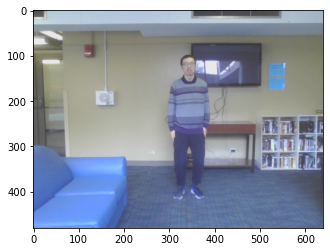

In [8]:
activity_fn='jump_03-02-12-34-01-795'
view_activity(activity_fn, 52, 59)

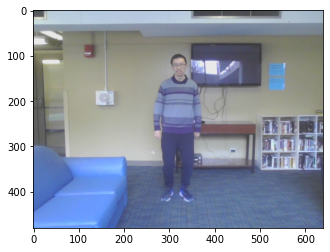

In [103]:
activity_fn='jump_03-02-12-34-01-795'
view_activity(activity_fn, 441, 541)

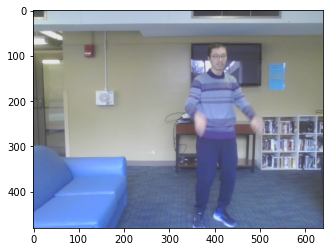

In [19]:
action='jump'
id=7
s,e,activity_fn=actions[action][id] 
view_activity(activity_fn, s, e) 

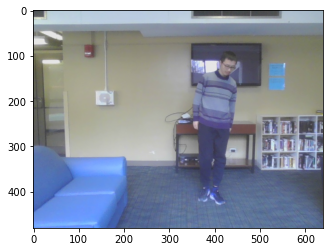

In [20]:
action='kick'
id=7
s,e,activity_fn=actions[action][id] 
view_activity(activity_fn, s, e) 

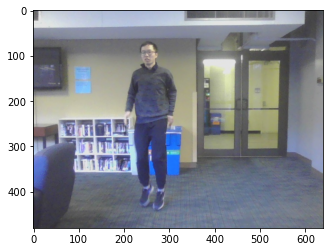

In [28]:
action='run'
id=1
s,e,activity_fn=actions[action][id] 
view_activity(activity_fn, s, e, delay=0.05) 

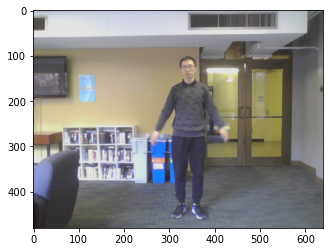

In [9]:
action='wave'
id=1
s,e,activity_fn=actions[action][id] 
view_activity(activity_fn, s, e, delay=0.05)

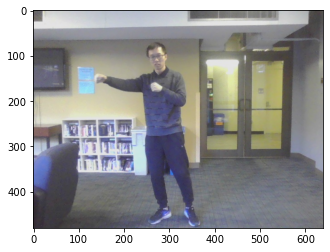

In [27]:
action='punch'
id=0
s,e,activity_fn=actions[action][id] 
view_activity(activity_fn, s, e, delay=0.05) 

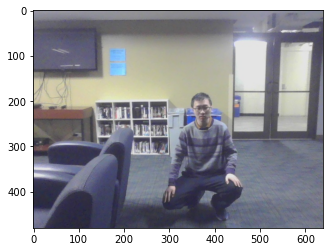

In [29]:
action='squat'
id=0
s,e,activity_fn=actions[action][id] 
view_activity(activity_fn, s, e, delay=0.05) 

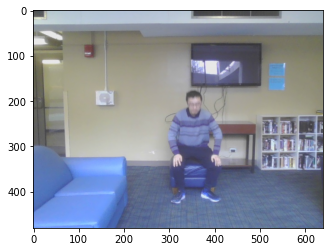

In [30]:
action='sit'
id=0
s,e,activity_fn=actions[action][id] 
view_activity(activity_fn, s, e, delay=0.05) 